In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../Data-Files/T0_data.csv')
df['Zip-code'].fillna('')
print(df.keys())
print(df['Zwemles J/N'])


Index(['Respondentnummer', 'Gender', 'IC ', 'Zip-code', 'Geboortedatum',
       'Leeftijd (op testdag)', 'AST (tijd afgerond op 0.1s)', 'MQ',
       'MQ catogory', 'Opmerkingen', 'Lengte (afgerond op 0.1 cm)',
       'Gewicht (afgerond op 0.1 kg)', 'Lengte (in m)', 'BMI', 'Gymles',
       'Zwemles J/N', 'Zwemles', 'Schoolplein', 'Buiten spelen', 'Sport J/N',
       'Sport', 'TV kijken/tablet', 'Opmerkingen ', '1. Rennen',
       '2. Bal gooien', '3. Galloperen', '4. Bal vangen', '5. Hinkelen',
       '6. Bal rollen', '7. Loopsprong', '8. Bal schoppen',
       '9. Voorw. Springen', '10. Knuppel', '11. Zijw. Gallop',
       '12. Stuiten bal', 'Opmerkingen2', 'Unnamed: 36'],
      dtype='object')
0       0.0
1       0.0
2       NaN
3       NaN
4       NaN
       ... 
1703    0.0
1704    1.0
1705    1.0
1706    1.0
1707    0.0
Name: Zwemles J/N, Length: 1708, dtype: float64


In [2]:
zip_list = []
for i in df['Zip-code']:
    if i not in zip_list and isinstance(i, str):
        zip_list.append(i) 
        

In [3]:
       
bmi_dict = {}
motor_categories = {}
motoric_bmi_dict = {}
motoric_gender_dict = {}
for index, rows in df.iterrows():
    if isinstance(rows['Zip-code'], str) and rows['Zip-code'] in zip_list:
       bmi_dict[rows['Zip-code']] = []
       motor_categories[rows['Zip-code']] = []
       motoric_bmi_dict[rows['Zip-code']] = {}
       motoric_gender_dict[rows['Zip-code']] = {}
 
for index, rows in df.iterrows():
    if isinstance(rows['Zip-code'], str) and rows['Zip-code'] in zip_list:
        if not pd.isna(rows['BMI']):
            bmi_dict[rows['Zip-code']].append(rows['BMI'])     

        if not pd.isna(rows['MQ catogory']):
            motor_categories[rows['Zip-code']].append(rows['MQ catogory'])

        if not pd.isna(rows['MQ']) and not pd.isna(rows['BMI']):
            motoric_bmi_dict[rows['Zip-code']] = []
        
        if not pd.isna(rows['MQ']) and not pd.isna(rows['Gender']):
            motoric_gender_dict[rows['Zip-code'], rows['Gender']] = []     

for index, rows in df.iterrows():
    if isinstance(rows['Zip-code'], str) and rows['Zip-code'] in zip_list:
        if not pd.isna(rows['MQ']) and not pd.isna(rows['Gender']):
            motoric_gender_dict[rows['Zip-code'], rows['Gender']].append(rows['MQ'])

In [4]:
children_swim_class_dict = {}
for index, rows in df.iterrows():
    
    if not pd.isna(rows['Zwemles J/N']):
        children_swim_class_dict[rows['Respondentnummer']] = rows['Zwemles J/N']
print

<function print>

<ipython-input-5-f08250088cd3>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bmi_dict.keys(), rotation=90)


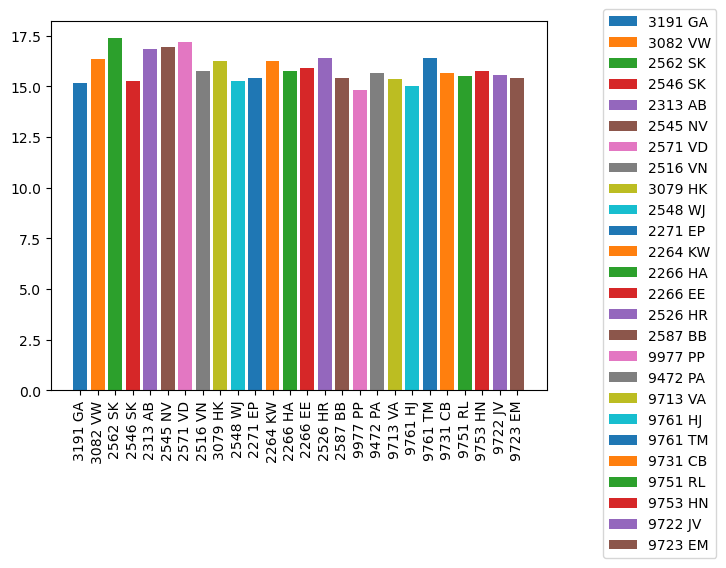

In [5]:
fig, ax = plt.subplots()

for key, value in bmi_dict.items():   
    x = key
    y = np.mean(value)
    ax.bar(x,y)

ax.set_xticklabels(bmi_dict.keys(), rotation=90)
ax.legend(bmi_dict.keys(), bbox_to_anchor=(1.1, 1.05))
plt.show()
ax.set_ylabel('BMI')
plt.show()

<ipython-input-6-e417e380fb5e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(motor_categories.keys(), rotation=90)


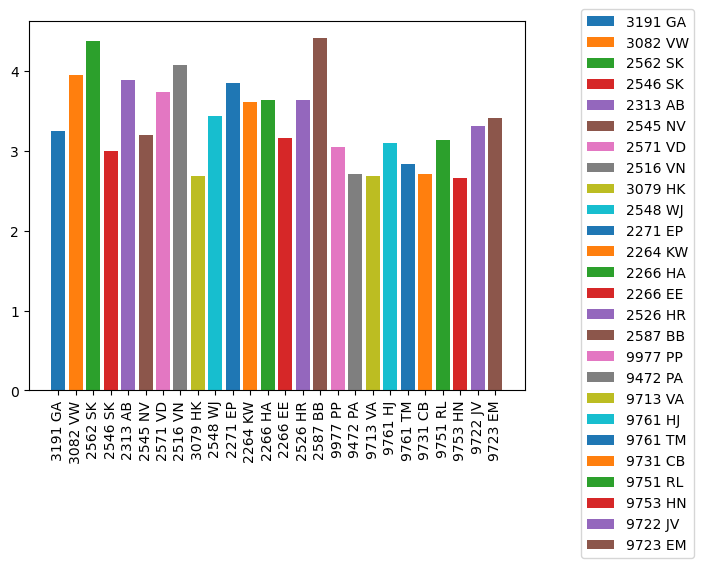

In [6]:
fig, ax = plt.subplots()

for key, value in motor_categories.items():
    x = key
    y = np.mean(value)
    ax.bar(x,y)

    
ax.set_xticklabels(motor_categories.keys(), rotation=90)
ax.legend(motor_categories.keys(), bbox_to_anchor=(1.1, 1.05))
plt.show()
ax.set_ylabel('motor categories')
plt.show()

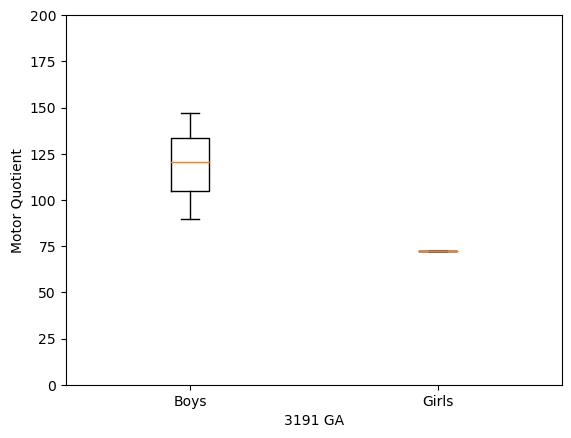

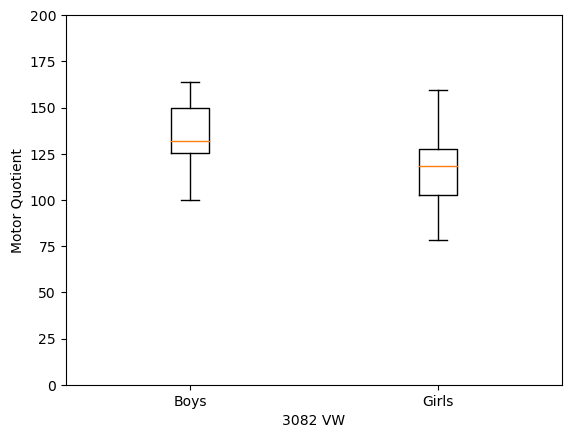

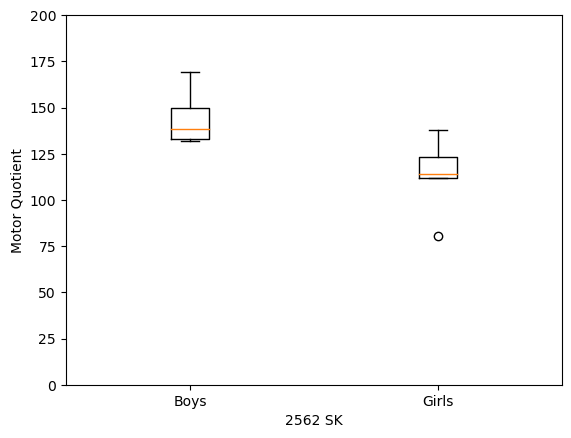

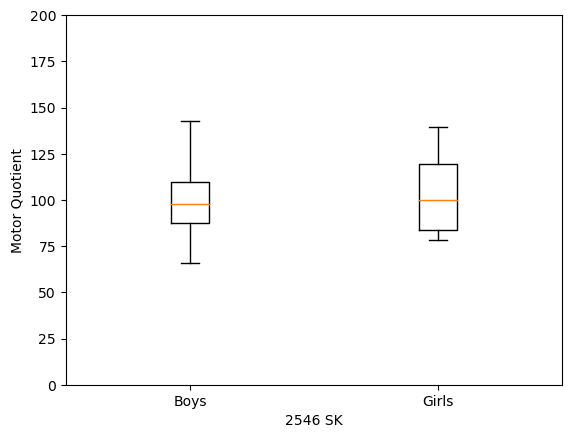

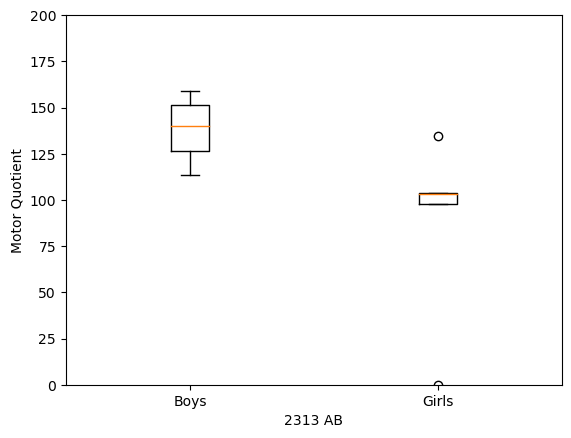

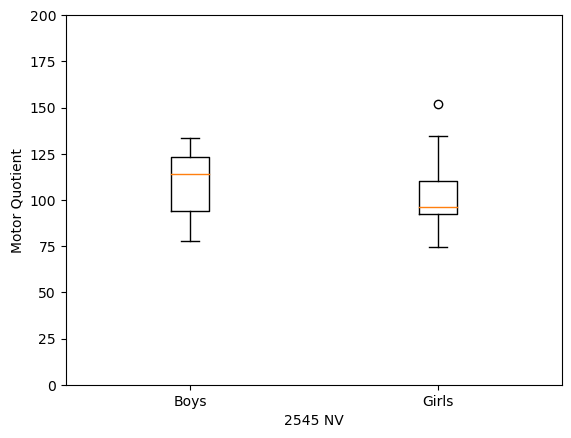

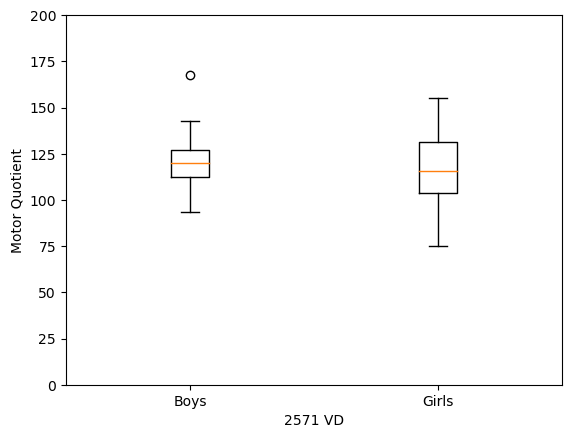

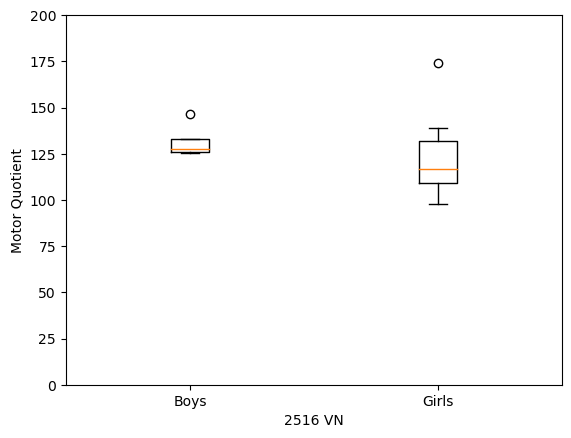

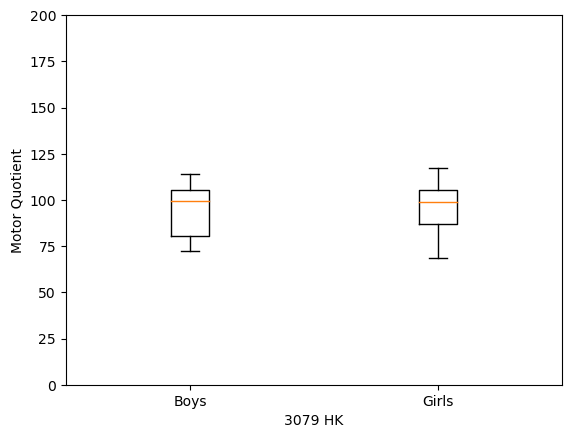

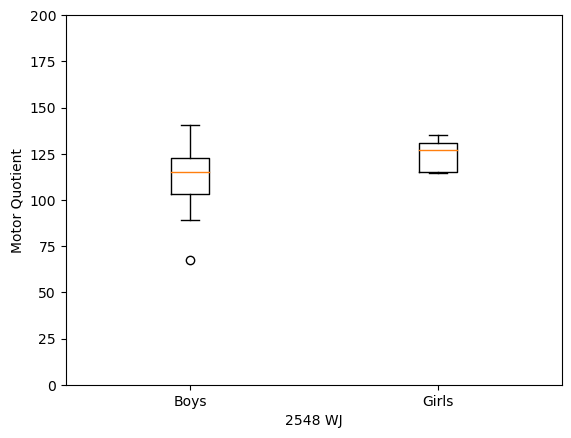

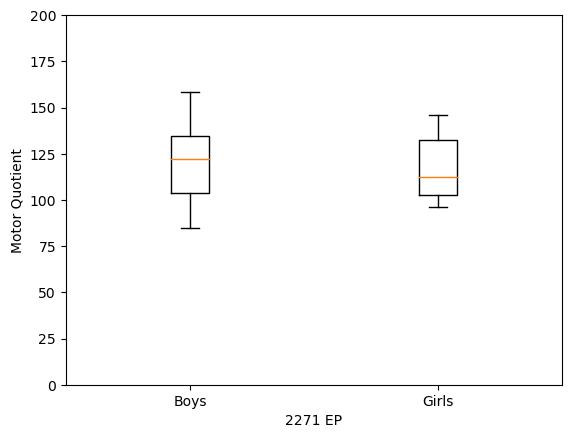

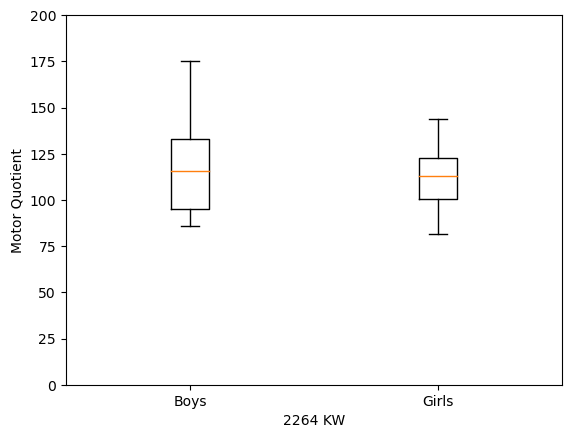

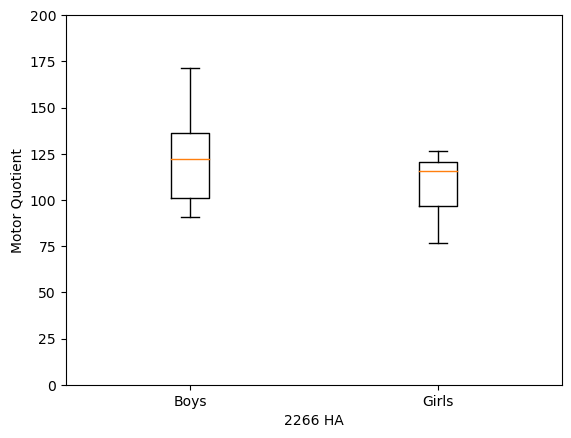

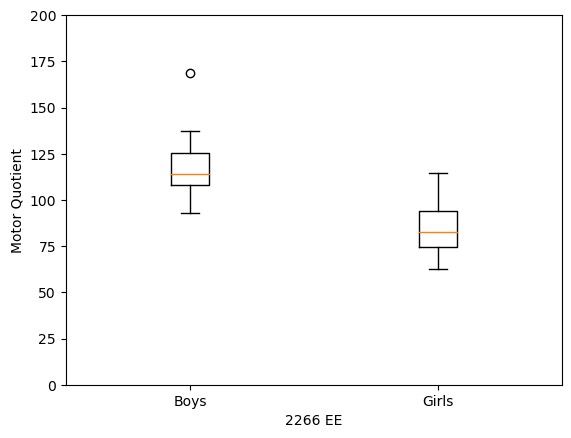

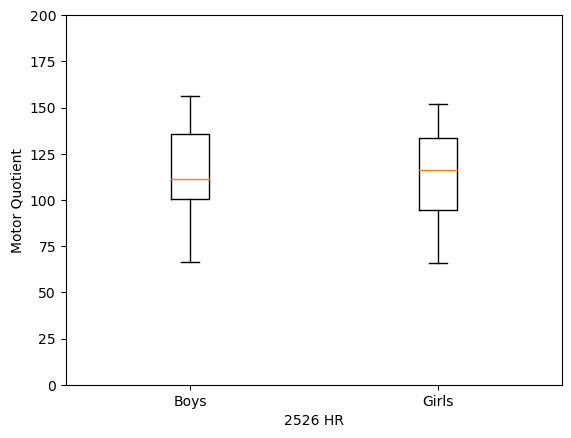

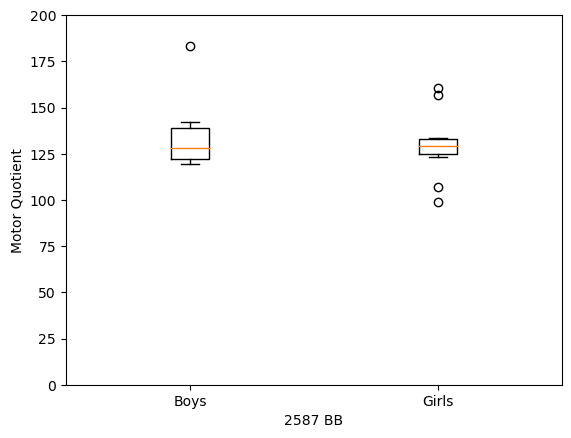

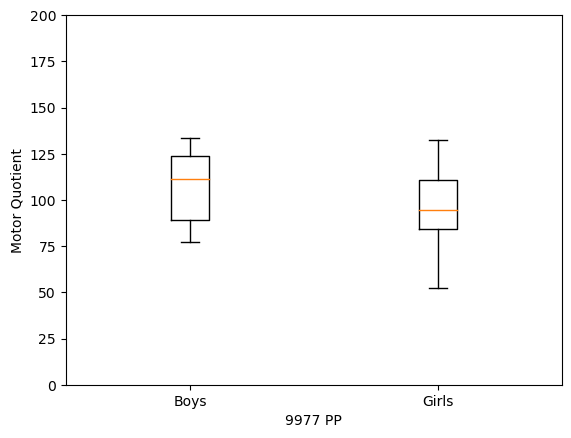

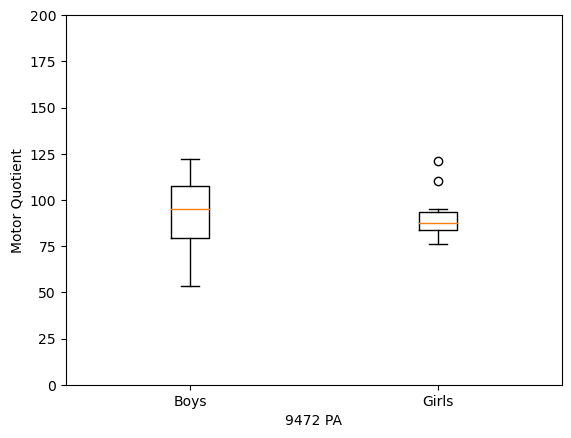

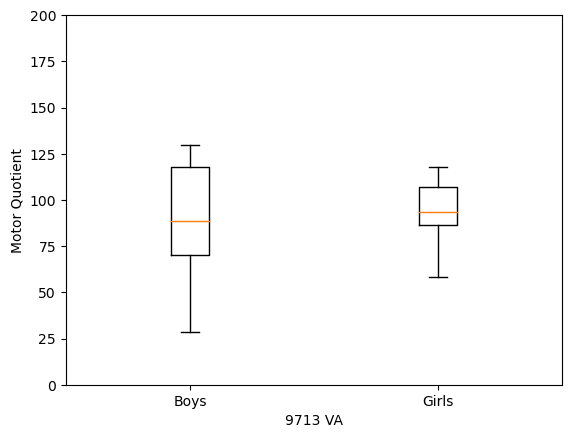

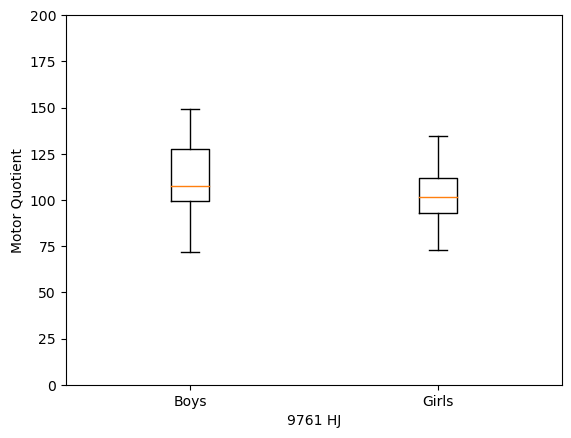

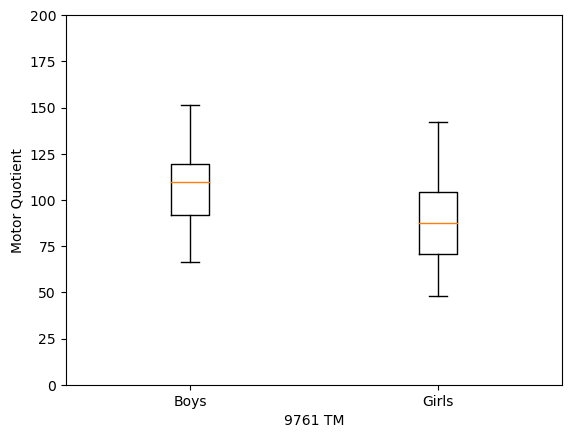

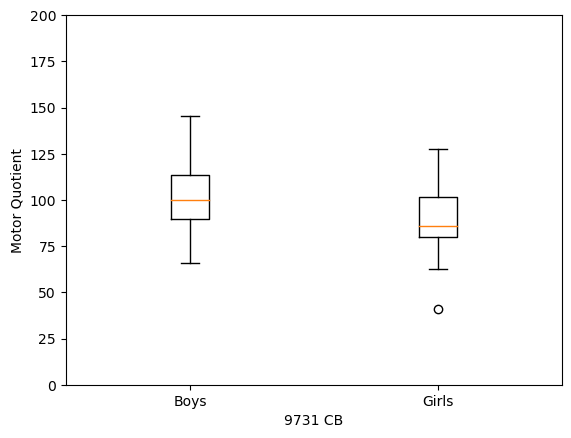

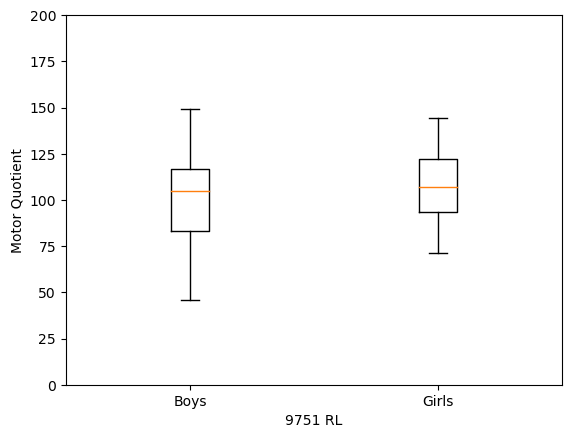

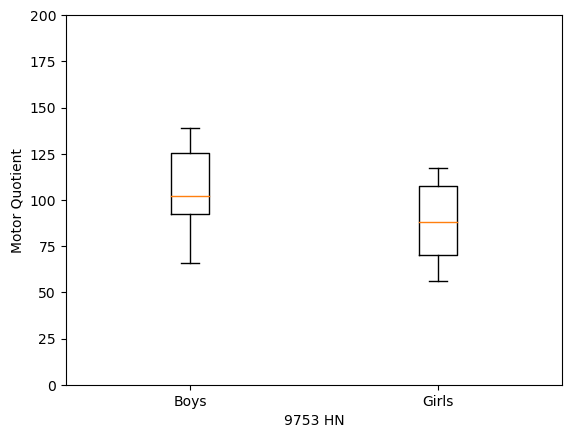

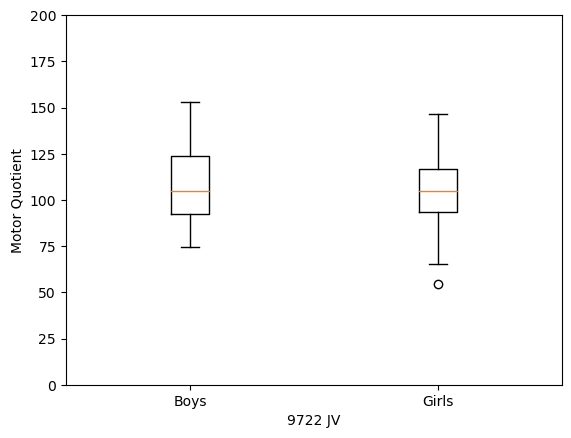

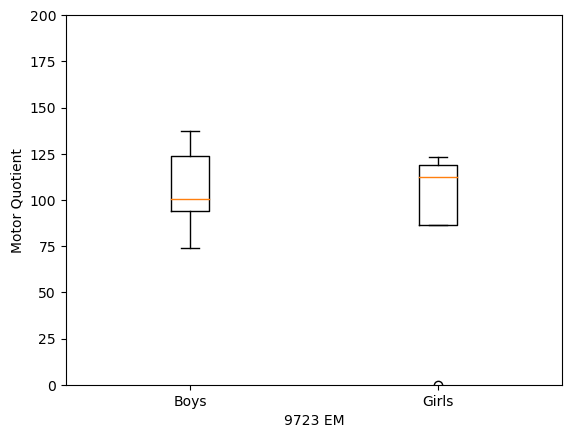

In [7]:


for i in zip_list:
    fig, ax = plt.subplots()
    y_boys = motoric_gender_dict[i, 0]
    y_girls = motoric_gender_dict[i,1]
    ax.boxplot([y_boys, y_girls])
    ax.set_xlabel(i)
    ax.set_ylim(0, 200)
    ax.set_xticklabels(['Boys', 'Girls'])
    ax.set_ylabel('Motor Quotient')
    plt.show()

    
#ax.set_xticklabels(str(x[1]), rotation=90)
#ax.legend(motoric_gender_dict.keys(), bbox_to_anchor=(1.1, 1.05))

